# Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
from datetime import timedelta
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("https://media.githubusercontent.com/media/nhanna1219/Global-Terrorism-OLAP/main/Terrorism.csv", encoding='latin1')

In [ ]:
df.head()

,FactID,dYear,dMonth,dDay,dDate,CountryID,CountryName,RegionID,RegionName,City,Latitude,Longitude,ProvState,AttackTypeID,AttackType,TargetTypeID,TargetType,WeaponTypeID,WeaponType,Kills,Wounds,Success,Suicide,PropertyDamage,GName
0,197000000001,1970,7,2,02/07/1970,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,Assassination,14,Private Citizens & Property,13,Unknown,1.0,0.0,1,0,0,MANO-D
1,197000000002,1970,1,1,01/01/1970,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,Federal,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),13,Unknown,0.0,0.0,1,0,0,23rd of September Communist League
2,197001000001,1970,1,1,01/01/1970,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,Tarlac,1,Assassination,10,Journalists & Media,13,Unknown,1.0,0.0,1,0,0,Unknown
3,197001000002,1970,1,1,01/01/1970,78,Greece,8,Western Europe,Athens,37.997490,23.762728,Attica,3,Bombing/Explosion,7,Government (Diplomatic),6,Explosives,-1.0,-1.0,1,0,1,Unknown
4,197001000003,1970,1,1,01/01/1970,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,Fukouka,7,Facility/Infrastructure Attack,7,Government (Diplomatic),8,Incendiary,-1.0,-1.0,1,0,1,Unknown


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df['Success'] = df['Success'].astype(int)
df['Kills'] = df['Kills'].astype(int)
df['Wounds'] = df['Wounds'].astype(int)
# Dropping non-relevant columns for simplicity
df_reduced = df[['CountryID', 'AttackTypeID','WeaponTypeID', 'TargetTypeID', 'Success']]
# df_reduced = df[['CountryID', 'AttackTypeID','WeaponTypeID', 'TargetTypeID', 'Success','Kills','Wounds','PropertyDamage']]
# Define features and target variable
X = df_reduced.drop('Success', axis=1)
y = df_reduced['Success']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

dt_model = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
start_dt = time.time()
dt_pred = dt_model.fit(X_train,y_train).predict(X_test)
end_dt = time.time()
times_dt = timedelta(seconds=round(end_dt - start_dt, 4)).total_seconds()
print("Times: ", times_dt)
dt_score = round(accuracy_score(y_test, dt_pred)*100,2 )
accuracy_dt = dt_score
print("Accuracy: ", accuracy_dt)
print("Report: ")
print(classification_report(y_test, dt_pred, digits=5))

Times:  0.2894
Accuracy:  90.15
Report: 
              precision    recall  f1-score   support

           0    0.61208   0.30777   0.40959      6024
           1    0.91859   0.97564   0.94625     48227

    accuracy                        0.90148     54251
   macro avg    0.76534   0.64170   0.67792     54251
weighted avg    0.88456   0.90148   0.88666     54251



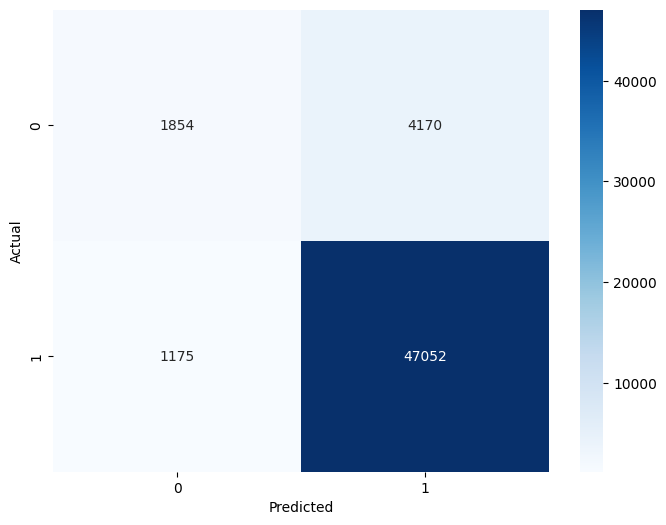

In [ ]:
conf_matrix = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
title = 'Decision Tree Score: {0}%'.format(dt_score)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()